# Week 9 Point Analysis Assignment

## Import libraries 
 
 Steps:
 1. Import regulars (e.g. pandas, numpy, and matplotlib) 
 2. Import seaborn for a visualization
 3. Import some other libraries to explore point patterns

In [93]:
# Import regulars
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

#  Import seaborn for a visualization
import seaborn as sns

#  Import some other libraries to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

## Import my disaster information
Steps:

1. Import my datasets of disaster
2. Convert pandas dataframe to geodataframe

In [94]:
# Import my datasets of disaster
df =  pd.read_csv('indonesia all geocoded province 2011_2020_final - Sheet1.csv')

In [95]:
# Convert pandas dataframe to geodataframe
gdf = gpd.GeoDataFrame(df, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

## Visualize the Data 1: mean and median centers and a standard deviational ellipse

Steps:
1. Drop the unmapped rows
2. Filter the columns
3. Drop rows with null values
4. Create x and y columns from "geometry" to use seaborn
5. Compute the mean and median centers
6. Create a map with mean and median centers
7. Create a map with mean and median centers and a standard deviational ellipse

**What I am visualizing:**

mean and median centers and a standard deviational ellipse of total deaths caused by floods in Indonesia

**Why it is interesting:**

This is interesting because it shows which areas are more likely to be prone to have more death tolls due to floods. 

In [96]:
# Drop the unmapped rows
gdf = gdf[gdf.Longitude!=0]

In [97]:
#Filter the columns
gdf=gdf[['Year','Location','Total Deaths','geometry']]

In [98]:
# Drop rows with null values
gdf = gdf.dropna()

In [99]:
# Create x and y columns from "geometry" to use seaborn
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

In [102]:
# Compute the mean and median centers
mean_center = centrography.mean_center(gdf[['x','y']])
med_center = centrography.euclidean_median(gdf[['x','y']])

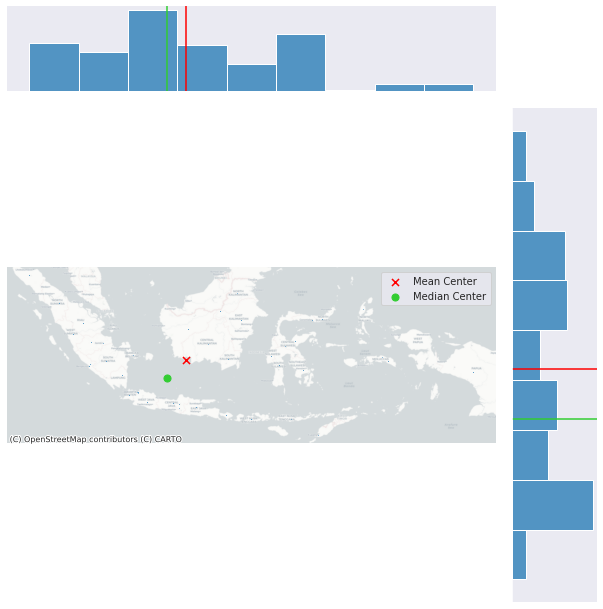

In [103]:
# Create a map with mean and median centers
g = sns.jointplot(
    x='x', y='y', data=gdf, s=0.75, height=9
)

g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

g.ax_joint.legend()

ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

g.ax_joint.set_axis_off()

plt.show()


In [104]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

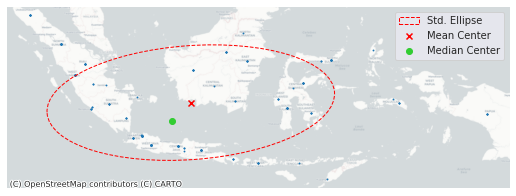

In [105]:
#Create a map with mean and median centers and a standard deviational ellipse
sns.set_style('dark')

f, ax = plt.subplots(1, figsize=(9, 9))


ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')


ellipse = Ellipse(xy=mean_center, 
                  width=major*2, 
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), 
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')


ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)


plt.show()

## Visualize the Data: the Magnitude of Death Toll

Steps:
1. Filter the columns (again)
2. Rename the columns
3. Count the total deaths
4. Creat a visualization 

**What I am visualizing:**

Magnitude of death toll of floods in Indonesia

**Why it is interesting:**

This is interesting because the difference in the size of circles provides better idea of the reason why the mean center is west side of Indonesia, compared to the previous visualization. In addition, it also shows that there are many people affected by floods in west side of Java island where Jakarta is located. 

In [106]:
# Filter the columns (again)
gdf=gdf[['Year','Location','Total Deaths','geometry']]

In [107]:
# Rename the columns
gdf.columns = ['year','location','deaths','geometry']

In [108]:
# Count the total deaths
gdf.deaths.value_counts()

6.0      22
2.0      19
4.0      18
9.0      16
10.0     14
7.0      13
1.0      12
8.0       9
13.0      6
3.0       6
66.0      5
5.0       5
21.0      4
11.0      4
12.0      3
17.0      3
15.0      3
105.0     2
32.0      2
14.0      2
18.0      2
20.0      2
34.0      1
53.0      1
35.0      1
206.0     1
Name: deaths, dtype: int64

In [109]:
# Top 5 Deaths
gdf.deaths.head()

2    21.0
3    18.0
4    10.0
5    13.0
6     8.0
Name: deaths, dtype: float64

2    21.0
3    18.0
4    10.0
5    13.0
6     8.0
Name: deaths, dtype: float64

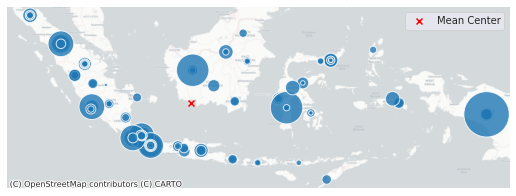

In [115]:
# Creat a visualization 
display(gdf.deaths.head()) 

ax = gdf.plot(figsize=(9,9), markersize=gdf.deaths*10,alpha=0.8,edgecolor='w')

ax.axis('off')

ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron)

ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.legend()

**Who contributes to the assignment?**

All visualizations are created by Hozumi Oshida